In [1]:
# Upload the CSV file to Colab from local machine
from google.colab import files

uploaded = files.upload()


Saving HealthCareData.xlsx to HealthCareData.xlsx


In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For better table display
from IPython.display import display

# Set Seaborn style
sns.set(style="whitegrid")

# Make sure plots display inline
%matplotlib inline


In [3]:
# Read the uploaded dataset
df = pd.read_excel("HealthCareData.xlsx")

# Display first 5 rows
display(df.head())

# Print info about the dataset
print("\nDataset Info:\n")
df.info()

# Print shape
print("\nDataset Shape:", df.shape)


,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES



Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 42 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   S.NO                                                                     950 non-null    int64  
 1   Age                                                                      950 non-null    int64  
 2   Gender                                                                   950 non-null    object 
 3   Place(location where the patient lives)                                  816 non-null    object 
 4   Duration of alcohol consumption(years)                                   950 non-null    int64  
 5   Quantity of alcohol consumption (quarters/day)                           950 non-null    int64  
 6   Type of alcohol consumed                                  

In [4]:
# Check the shape of the dataset
print("Dataset Shape:", df.shape)

# Check data types and non-null counts
print("\nDataset Info:\n")
df.info()

# Check for missing values
print("\nMissing Values per Column:\n")
print(df.isnull().sum())


Dataset Shape: (950, 42)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 42 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   S.NO                                                                     950 non-null    int64  
 1   Age                                                                      950 non-null    int64  
 2   Gender                                                                   950 non-null    object 
 3   Place(location where the patient lives)                                  816 non-null    object 
 4   Duration of alcohol consumption(years)                                   950 non-null    int64  
 5   Quantity of alcohol consumption (quarters/day)                           950 non-null    int64  
 6   Type of alcohol consumed         

In [5]:
# Check unique values in 'Gender' column
print("\nUnique values in 'Gender':", df['Gender'].unique())

# Manual encoding: Male → 1, Female → 0
df['Gender'] = [1 if gender == 'Male' else 0 for gender in df['Gender']]



Unique values in 'Gender': ['male' 'female' 'transgender' 'female ']


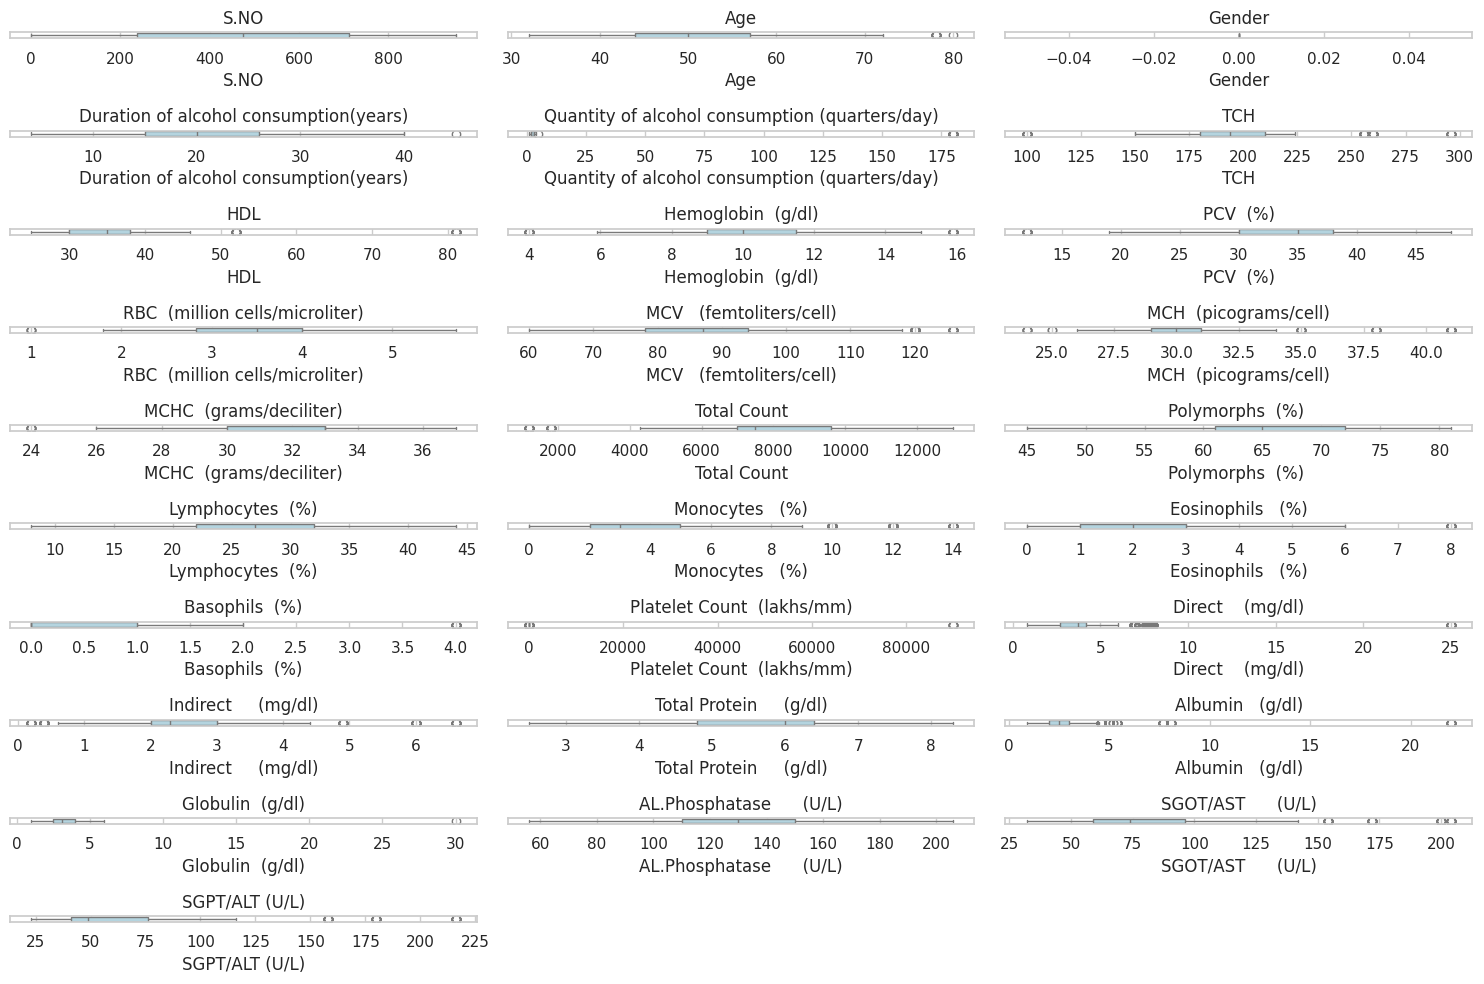

In [8]:
# List numerical columns (excluding the target if needed)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols)+2)//3, 3, i+1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(col)
    plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
# Function to cap outliers using IQR method
def cap_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

# Apply to all numerical columns (excluding 'Dataset')
for col in numerical_cols:
    cap_outliers(col)


In [12]:
from sklearn.model_selection import train_test_split

# Split into features and label
X = df.drop('Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)', axis=1)
y = df['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (760, 41)
X_test shape: (190, 41)


In [18]:
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns


# Convert columns with mixed types to string type
for col in categorical_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)


# Create a column transformer to apply one-hot encoding to categorical columns and impute numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', SimpleImputer(strategy='mean'), numerical_cols) # Impute numerical columns
    ],
    remainder='passthrough' # This might pass through any columns not specified above, which we don't want.
)

# Create a pipeline that first preprocesses the data and then applies normalization
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('normalizer', Normalizer(norm='l1'))])


# Apply the pipeline to X_train and X_test
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Confirm shape
print("Normalized X_train shape:", X_train.shape)
print("Normalized X_test shape:", X_test.shape)

Normalized X_train shape: (760, 263)
Normalized X_test shape: (190, 263)


In [19]:
# Descriptive statistics for numerical columns
print("📊 Descriptive Statistics (Numerical Columns):\n")
display(df.describe())


📊 Descriptive Statistics (Numerical Columns):



,S.NO,Age,Gender,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),...,Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,950.000000,950.000000,950.0,950.000000,950.000000,591.000000,582.000000,950.000000,920.000000,398.000000,...,901.000000,950.000000,950.000000,895.000000,889.000000,941.000000,921.000000,940.000000,950.000000,950.000000
mean,475.500000,50.614737,0.0,20.603684,2.202632,197.436548,34.975945,10.270295,33.875217,3.391332,...,0.481909,1.451621,3.722579,2.420782,5.590326,2.548778,3.219273,132.524468,80.489474,59.791579
std,274.385677,8.753533,0.0,7.973021,0.822012,22.663394,5.802199,1.884459,5.533571,0.935501,...,0.644771,0.393631,1.590711,0.962887,1.314308,0.874163,1.014820,27.462559,26.934205,24.929642
min,1.000000,32.000000,0.0,4.000000,1.000000,135.000000,25.000000,5.250000,18.000000,1.062500,...,0.000000,0.520000,0.800000,0.500000,2.500000,0.900000,1.000000,56.000000,32.000000,23.000000
25%,238.250000,44.000000,0.0,15.000000,2.000000,180.000000,30.000000,9.000000,30.000000,2.825000,...,0.000000,1.200000,2.700000,2.000000,4.800000,2.000000,2.500000,110.000000,59.000000,41.000000
50%,475.500000,50.000000,0.0,20.000000,2.000000,194.000000,35.000000,10.000000,35.000000,3.500000,...,0.000000,1.420000,3.700000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,49.000000
75%,712.750000,57.000000,0.0,26.000000,3.000000,210.000000,38.000000,11.500000,38.000000,4.000000,...,1.000000,1.700000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000
max,950.000000,76.500000,0.0,42.500000,4.500000,255.000000,50.000000,15.250000,48.000000,5.700000,...,2.500000,2.450000,6.450000,4.500000,8.300000,4.500000,6.250000,206.000000,151.500000,128.500000


In [20]:
# Descriptive statistics for categorical columns
print("🧾 Descriptive Statistics (Categorical Columns):\n")
display(df.describe(include='object'))


🧾 Descriptive Statistics (Categorical Columns):



,Place(location where the patient lives),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Blood pressure (mmhg),Obesity,Family history of cirrhosis/ hereditary,TG,LDL,Total Bilirubin (mg/dl),A/G Ratio,USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
count,816,950,950,950,950,950,950,950,591,591,950,591.00,950,896
unique,3,4,3,3,2,49,2,3,40,31,49,44.00,2,2
top,rural,country liquor,negative,negative,YES,110/70,yes,no,160,120,7,0.75,YES,YES
freq,453,478,793,810,647,135,549,871,65,82,77,86.00,911,876


In [21]:
# For example, get value counts for Gender column
print("🔢 Value counts for 'Gender':\n")
print(df['Gender'].value_counts())


🔢 Value counts for 'Gender':

Gender
0.0    950
Name: count, dtype: int64


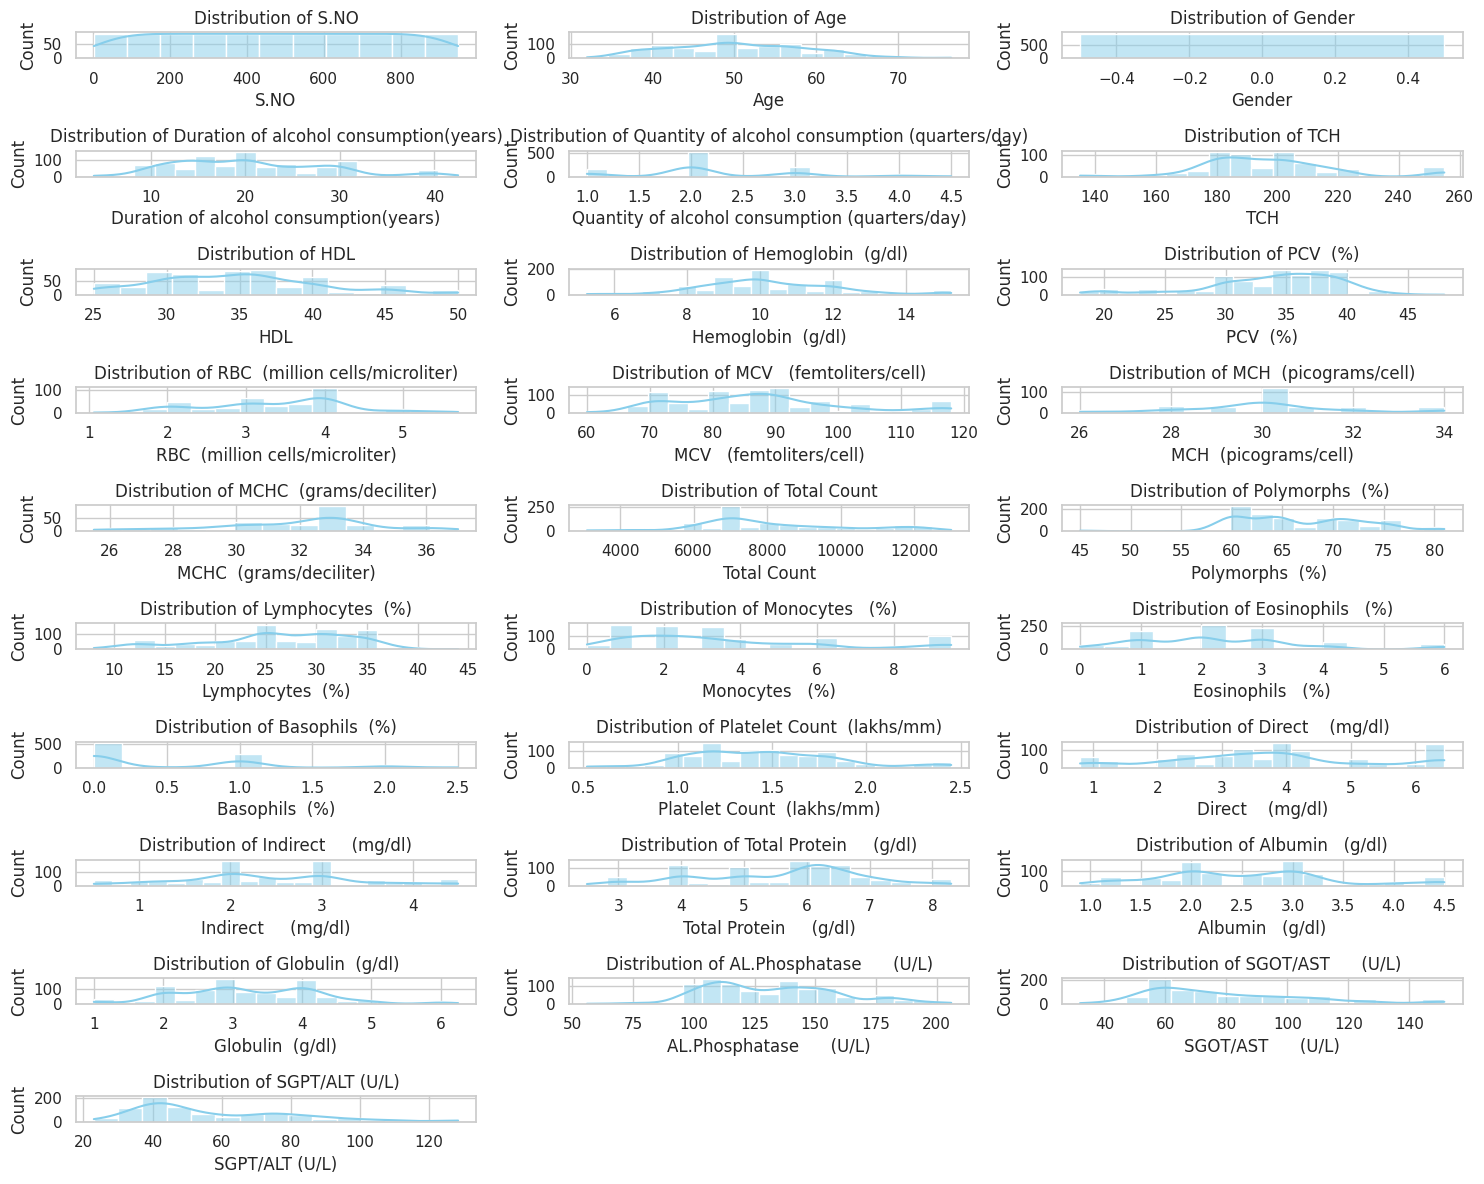

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot histograms
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) + 2)//3, 3, i+1)
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()


/tmp/ipython-input-23-3153825898.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/tmp/ipython-input-23-3153825898.py:10: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
/tmp/ipython-input-23-3153825898.py:10: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
/tmp/ipython-input-23-3153825898.py:10: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()
/tmp/ipython-input-23-3153825898.py:10: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight

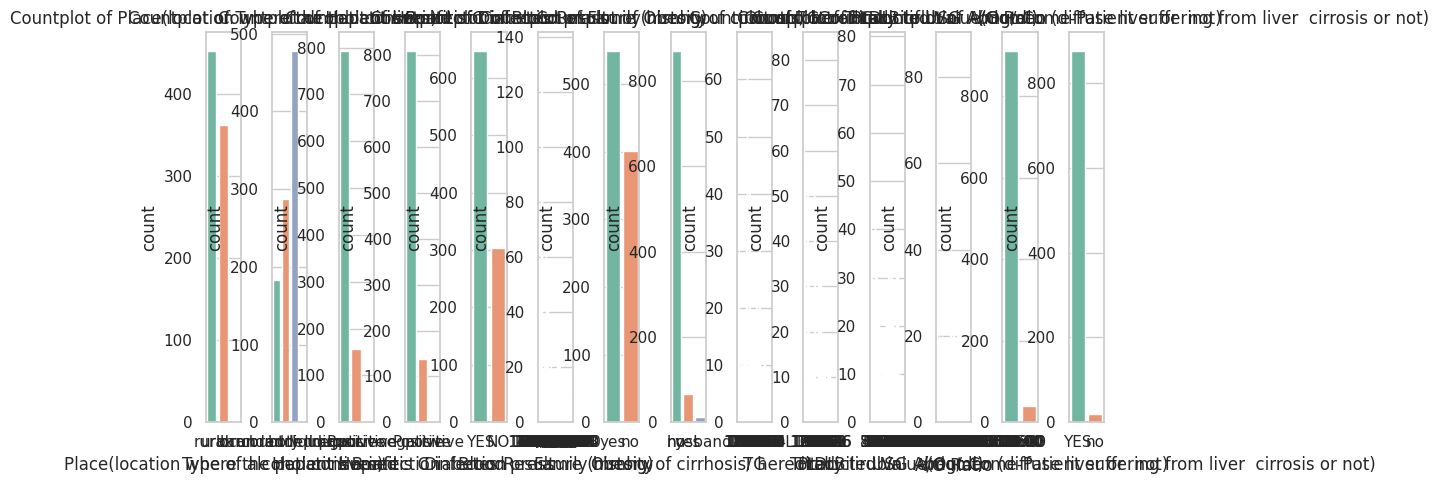

In [23]:
# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Plot countplots
plt.figure(figsize=(10, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i+1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Countplot of {col}')
    plt.tight_layout()
plt.show()


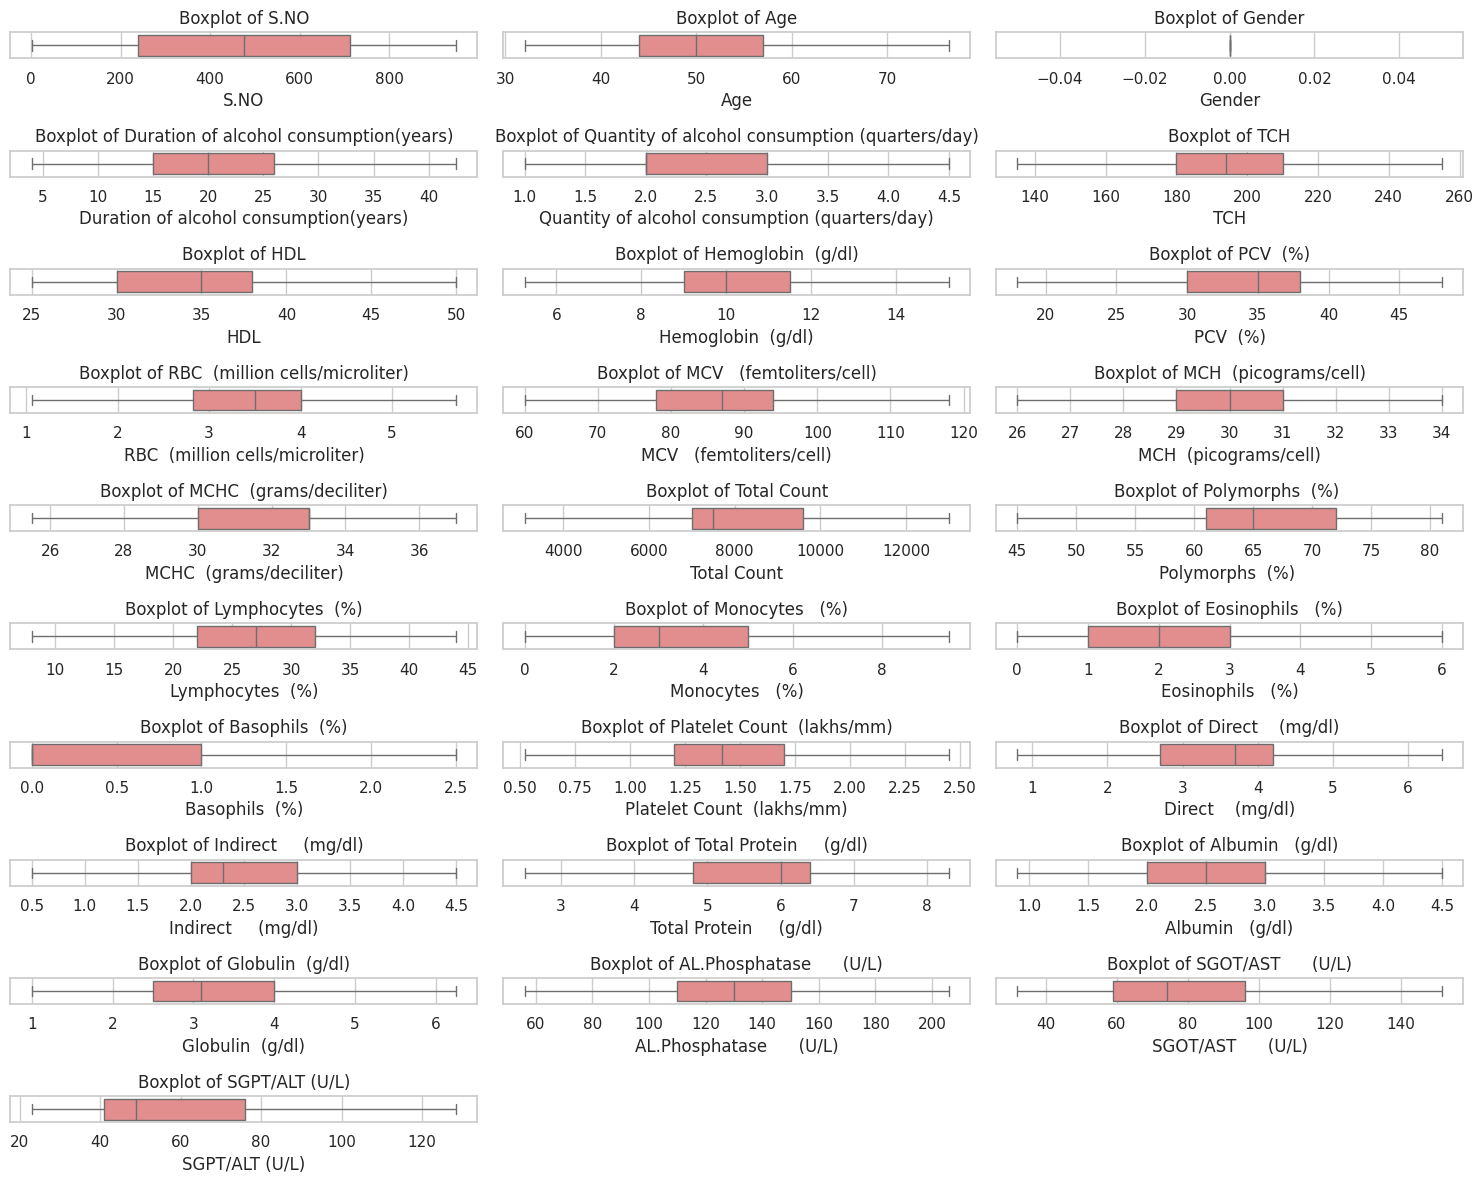

In [24]:
# Boxplots for all numeric features
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) + 2)//3, 3, i+1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()


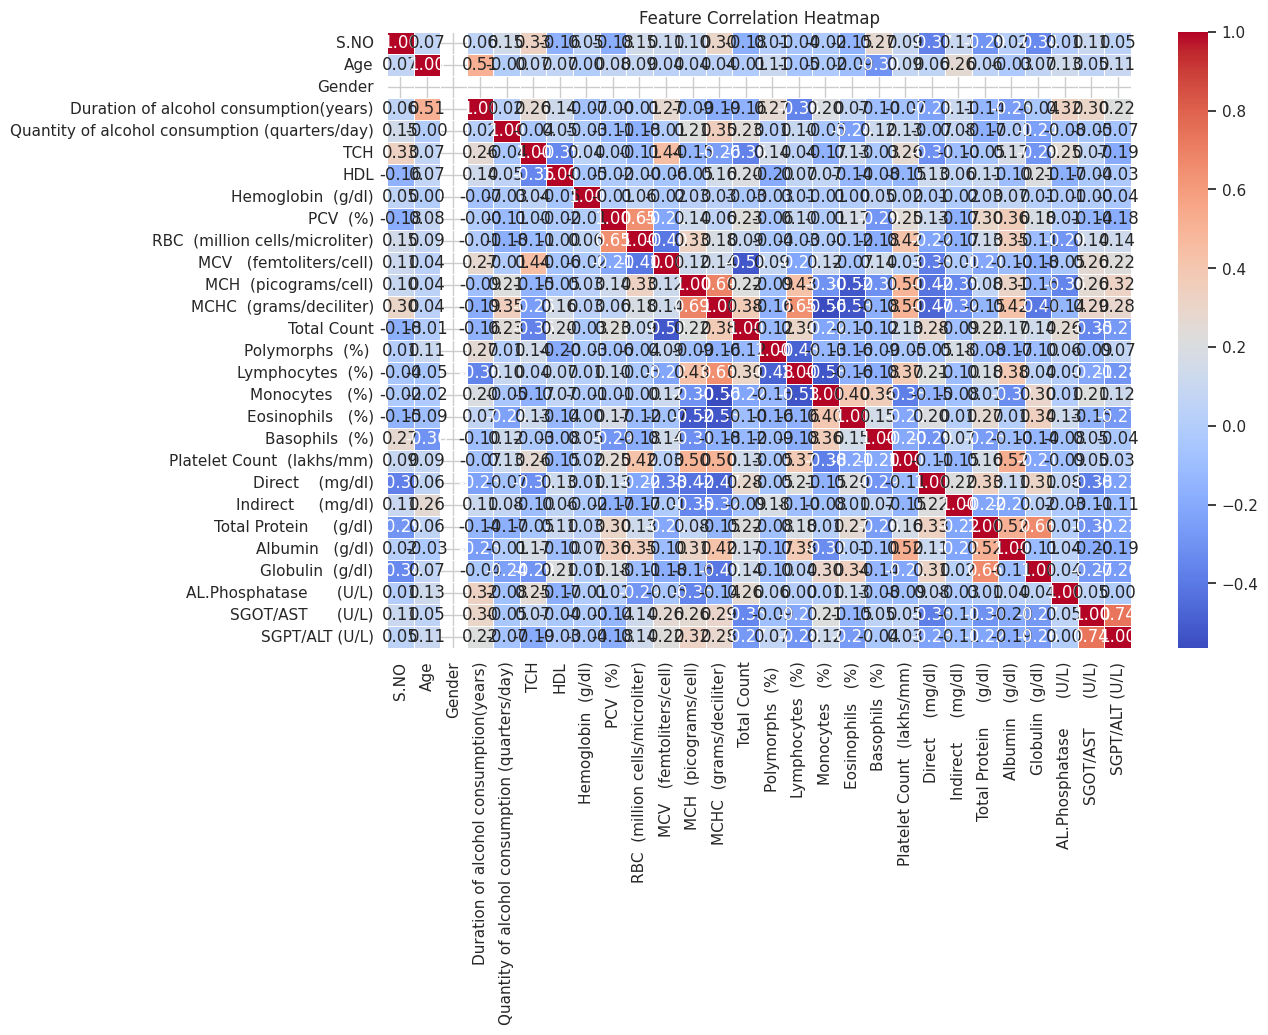

In [25]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [60]:
# Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [61]:
def models_eval_mm(X_train, y_train, X_test, y_test):
    models = {
        "Logistic Regression": LogisticRegression(),
        "Logistic Regression CV": LogisticRegressionCV(cv=5),
        "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "Ridge Classifier": RidgeClassifier(),
        "KNN Classifier": KNeighborsClassifier(n_neighbors=5),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
    }

    results = {}

    print("Training Models...\n")
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        acc = accuracy_score(y_test, y_pred)

        results[name] = {
            "Train Score": round(train_score, 4),
            "Test Score": round(test_score, 4),
            "Accuracy": round(acc, 4),
            "Model": model
        }

    return results


In [93]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')


# 1. Encode all categorical columns
df_encoded = df.copy()  # make a copy to preserve original
label_encoder = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
  # Convert to string type before encoding
  df_encoded[col] = df_encoded[col].astype(str)
  df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# 2. Split features and label
# Ensure the target column is treated as object/string type before splitting
df_encoded['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'] = df_encoded['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'].astype(str)

X = df_encoded.drop('Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)', axis=1)
y = df_encoded['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 4. Preprocess the data using the pipeline defined in the previous cell
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create a column transformer to apply one-hot encoding to categorical columns and impute numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', SimpleImputer(strategy='mean'), numerical_cols) # Impute numerical columns
    ],
    remainder='passthrough' # This might pass through any columns not specified above, which we don't want.
)

# Create a pipeline that first preprocesses the data and then applies normalization
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('normalizer', Normalizer(norm='l1'))])

# Apply the pipeline to X_train and X_test
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Encode the target variable and convert to integer type
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train.astype(str)).astype(int)
y_test_encoded = le.transform(y_test.astype(str)).astype(int)


# 5. Define your model training function if not already defined
from sklearn.linear_model import LogisticRegression, RidgeClassifier, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


def models_eval_mm(X_train, y_train, X_test, y_test):
    models = {
        "Logistic Regression": LogisticRegression(),
        "Logistic Regression CV": LogisticRegressionCV(cv=5),
        "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "Ridge Classifier": RidgeClassifier(),
        "KNN Classifier": KNeighborsClassifier(n_neighbors=5),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
    }

    results = {}

    print("Training Models...\n")
    for name, model in models.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      train_score = model.score(X_train, y_train)
      test_score = model.score(X_test, y_test)
      acc = accuracy_score(y_test, y_pred)

      results[name] = {
            "Train Score": round(train_score, 4),
            "Test Score": round(test_score, 4),
            "Accuracy": round(acc, 4),
            "Model": model
        }

    return results

# 6. Train models and evaluate using the processed data and encoded target
model_results = models_eval_mm(X_train_processed, y_train_encoded, X_test_processed, y_test_encoded)

# 7. Display results
print("\n📊 Model Evaluation Results:\n")
best_model_name = ""
best_accuracy = 0

for name, result in model_results.items():
    print(f"🔍 {name}")
    print(f"    ✅ Train Score: {result['Train Score']}")
    print(f"    ✅ Test Score : {result['Test Score']}")
    print(f"    ✅ Accuracy    : {result['Accuracy']}")
    print("-" * 45)

    if result["Accuracy"] > best_accuracy:
        best_accuracy = result["Accuracy"]
        best_model_name = name
        best_model = result["Model"]

print(f"\n🏆 Best Performing Model: {best_model_name} with Accuracy = {best_accuracy}")

Training Models...


📊 Model Evaluation Results:

🔍 Logistic Regression
    ✅ Train Score: 0.9197
    ✅ Test Score : 0.9316
    ✅ Accuracy    : 0.9316
---------------------------------------------
🔍 Logistic Regression CV
    ✅ Train Score: 0.9421
    ✅ Test Score : 0.9474
    ✅ Accuracy    : 0.9474
---------------------------------------------
🔍 XGBoost Classifier
    ✅ Train Score: 1.0
    ✅ Test Score : 0.9105
    ✅ Accuracy    : 0.9105
---------------------------------------------
🔍 Ridge Classifier
    ✅ Train Score: 0.9197
    ✅ Test Score : 0.9316
    ✅ Accuracy    : 0.9316
---------------------------------------------
🔍 KNN Classifier
    ✅ Train Score: 0.9474
    ✅ Test Score : 0.9526
    ✅ Accuracy    : 0.9526
---------------------------------------------
🔍 Random Forest
    ✅ Train Score: 1.0
    ✅ Test Score : 0.9158
    ✅ Accuracy    : 0.9158
---------------------------------------------

🏆 Best Performing Model: KNN Classifier with Accuracy = 0.9526


In [94]:
# Display Results
print("\n📊 Model Evaluation Results:\n")
best_model_name = ""
best_accuracy = 0

for name, result in model_results.items():
    print(f"{name}")
    print(f"    Train Score: {result['Train Score']}")
    print(f"    Test Score : {result['Test Score']}")
    print(f"    Accuracy    : {result['Accuracy']}")
    print("-" * 45)

    if result["Accuracy"] > best_accuracy:
        best_accuracy = result["Accuracy"]
        best_model_name = name
        best_model = result["Model"]

print(f"\nBest Performing Model: {best_model_name} with Accuracy = {best_accuracy}")


📊 Model Evaluation Results:

Logistic Regression
    Train Score: 0.9197
    Test Score : 0.9316
    Accuracy    : 0.9316
---------------------------------------------
Logistic Regression CV
    Train Score: 0.9421
    Test Score : 0.9474
    Accuracy    : 0.9474
---------------------------------------------
XGBoost Classifier
    Train Score: 1.0
    Test Score : 0.9105
    Accuracy    : 0.9105
---------------------------------------------
Ridge Classifier
    Train Score: 0.9197
    Test Score : 0.9316
    Accuracy    : 0.9316
---------------------------------------------
KNN Classifier
    Train Score: 0.9474
    Test Score : 0.9526
    Accuracy    : 0.9526
---------------------------------------------
Random Forest
    Train Score: 1.0
    Test Score : 0.9158
    Accuracy    : 0.9158
---------------------------------------------

Best Performing Model: KNN Classifier with Accuracy = 0.9526
